In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
dataset = pd.read_csv('User_Data.csv')

In [15]:
x = dataset.iloc[:,[2, 3]].values # 입력
y = dataset.iloc[:, 4].values # 출력

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.25, random_state= 0)

In [17]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance.
# Parameters :
  # copy : bool, default=True / If False, try to avoid a copy and do inplace scaling instead
  # with_mean : bool, default=True / If True, center the data before scaling.
  # with_std : bool, default=True / If True, scale the data to unit variance
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)  # Fit to data, then transform it.
xtest = sc_x.transform(xtest)  # Perform standardization by centering and scaling.
print(xtrain[0:10, :])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [18]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression (aka logit, MaxEnt) classifier.
# Parameters :
  # penalty : {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’ / Specify the norm of the penalty
  # dual : bool, default=False / Dual or primal formulation.
  # tol : float, default=1e-4 / Tolerance for stopping criteria.
  # C : float, default=1.0 / Inverse of regularization strength
  # fit_intercept : bool, default=True / Specifies if a constant should be added to the decision function.
  # intercept_scaling : float, default=1 / Useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True.
  # class_weight : dict or ‘balanced’, default=None / Weights associated with classes in the form {class_label: weight}.
  # random_state : int, RandomState instance, default=None / Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data.
  # solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’ / Algorithm to use in the optimization problem.
  # max_iter : int, default=100 / Maximum number of iterations taken for the solvers to converge.
  # multi_class : {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’ / If the option chosen is ‘ovr’, then a binary problem is fit for each label.
  # verbose : int, default=0 / For the liblinear and lbfgs solvers set verbose to any positive number for verbosity.
  # warm_start : bool, default=False / When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.
  # n_jobs : int, default=None / Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”.
  # l1_ratio : float, default=None / The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1.
classifier = LogisticRegression(random_state= 0)
classifier.fit(xtrain, ytrain)  # Fit the model according to the given training data.
y_pred = classifier.predict(xtest)  # Predict class labels for samples in X.

In [19]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix to evaluate the accuracy of a classification.
cm = confusion_matrix(ytest, y_pred)
print('혼동행렬 : \n', cm)

혼동행렬 : 
 [[65  3]
 [ 8 24]]


In [20]:
from sklearn.metrics import accuracy_score
# Accuracy classification score.
print("정확도 : ", accuracy_score(ytest,y_pred))

정확도 :  0.89


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


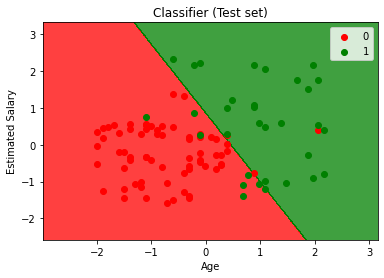

In [21]:
# show colormap
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()